In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

#For editable text. Except latex text is still shapes sadly
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
sns.set_style("whitegrid")
font = {'size' : 6}
lines = {'linewidth' : 0.5}
fig = {'figsize' : (2.5, 1.5)}
mpl.rc('font', **font)
mpl.rc('lines', **lines)
mpl.rc('figure', **fig)
#Set style
sns.set(style="whitegrid", palette="pastel", color_codes=True)

In [2]:
def save_figure_pdf(fig, path_to_save):
	'''
	Utility fxn to save a figure without having to retype all the required options.
	Input:
		fig - a matplotlib.pyplot.figure instance with the figure you'd like to save
		path_to_save - the path you'd like to save the figure to
	Returns: Nothing but there should now be a pdf version in 300 dpi with a transparent bkg at path_to_save
	'''
	fig.savefig(path_to_save, dpi = 300,
                bbox_inches = 'tight', transparent = True)

In [3]:

brainGini = pd.read_csv("gini6_perCluster_brain_NORMAL_01212021.csv",
                       sep = ",", index_col = 0)

In [4]:
# there are only two DEGs for microglia, so exclude
brainGini.drop(["Mic-gini"], axis = 1, inplace = True)

In [5]:
fullNames = ["Astrocyte", "Excitatory Neuron", "Inhibitory Neuron",
             "Oligodendrocyte", "Oligodendrocyte Precursor Cell"]
brainGini.columns = fullNames

In [6]:
# exported off coolors
#4BA3C3
# 96C9DC
colors = {"Mango":"96C9DC","Orange Pantone":"fb5607","Winter Sky":"ff006e","Blue Violet":"8338ec","Azure":"3a86ff"}

# add the pound for matplotlib
for c in colors:
    colors[c] = "#" + colors[c]
colors = list(colors.values())

sns.color_palette(colors)


[(0.5882352941176471, 0.788235294117647, 0.8627450980392157),
 (0.984313725490196, 0.33725490196078434, 0.027450980392156862),
 (1.0, 0.0, 0.43137254901960786),
 (0.5137254901960784, 0.2196078431372549, 0.9254901960784314),
 (0.22745098039215686, 0.5254901960784314, 1.0)]

In [7]:
cell_pal = {}
for i, cell in enumerate(fullNames):
    cell_pal[cell] = colors[i]

In [8]:
cell_pal

{'Astrocyte': '#96C9DC',
 'Excitatory Neuron': '#fb5607',
 'Inhibitory Neuron': '#ff006e',
 'Oligodendrocyte': '#8338ec',
 'Oligodendrocyte Precursor Cell': '#3a86ff'}

In [9]:
giniMelt = pd.melt(brainGini, value_vars = brainGini.columns)

In [10]:
giniMelt = giniMelt[giniMelt['value'].notna()]

In [11]:
degDict = {}
for i in brainGini:
    degDict[i] = brainGini[i].dropna().index.tolist()
    print(len(degDict[i]))

22
70
8
25
24


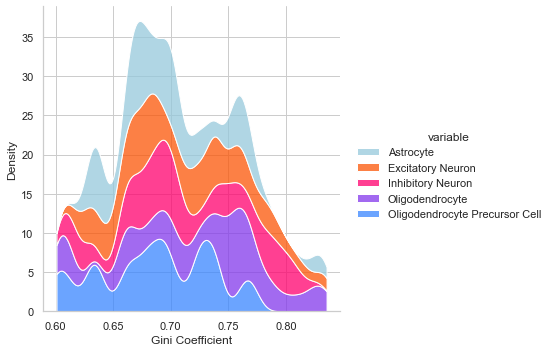

In [12]:
lowerBound = np.min(giniMelt["value"])
upperBound = np.max(giniMelt["value"])


g = sns.displot(giniMelt, x = "value", 
            multiple = "stack",
            kind = "kde",
            bw_adjust=.3,
            clip = (lowerBound, upperBound),
            hue = "variable",
            common_norm = False,
           palette = cell_pal)
g.set( xlabel = "Gini Coefficient", ylabel = "Density")

In [96]:
save_figure_pdf(g, "brainGiniDistrib_02112021.pdf")